Deep Neural Network (DNN) - MNIST Example
=========================================
Deep Neural Network (DNN) with Tensor Flow **(Keras - CNN)** 


In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import TensorBoard

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import deepmods.notebook as ooo
import logging

ooo.init(id='14.2.2', hide_warning=True, save_figs=True)


Deepmod by pjluc 2019
  Version          : 0.4.1
  Run time         : Monday 2 December 2019, 16:56:02
  Run directory    : ./run/lab-14.2.2
  Save figs        : True
  Matplotlib style : deepmods/talk.mplstyle
  Hide warning     : True

TensorFlow version :  1.14.0
Keras version      :  2.2.4-tf

Init done.


## Retrieve data

In [2]:
img_rows, img_cols = 28, 28
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test  = x_test.reshape(x_test.shape[0],   img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32') / 255
x_test  = x_test.astype('float32')  / 255

# x_train=x_train[:6000]
# y_train=y_train[:6000]
# y_train = to_categorical(y_train)
# y_test  = to_categorical(y_test)


x_train :  (60000, 28, 28, 1)
y_train :  (60000,)
x_test  :  (10000, 28, 28, 1)
y_test  :  (10000,)


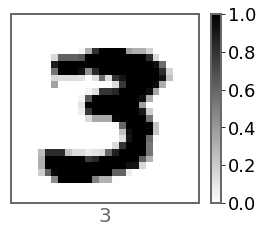

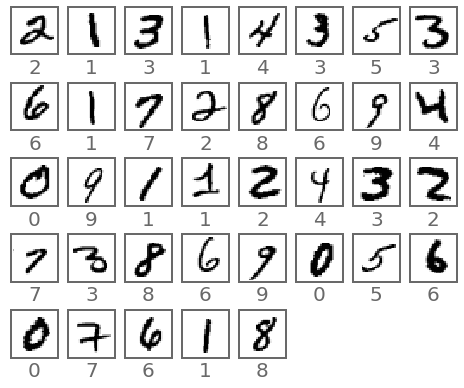

In [3]:
print("x_train : ",x_train.shape)
print("y_train : ",y_train.shape)
print("x_test  : ",x_test.shape)
print("y_test  : ",y_test.shape)

ooo.plot_images(x_train.reshape(-1,28,28),y_train, [27],  x_size=5,y_size=5, colorbar=True,save_as="One-digits")
ooo.plot_images(x_train.reshape(-1,28,28),y_train, range(5,42), columns=8, save_as="Many-digits")

## Create model

In [4]:
batch_size  =  64
num_classes =  10
epochs      =  4


In [5]:
model = keras.models.Sequential()
model.add( keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1))) #32
model.add( keras.layers.MaxPooling2D((2, 2)))
model.add( keras.layers.Conv2D(64, (3, 3), activation='relu')) #32
model.add( keras.layers.MaxPooling2D((2, 2)))
model.add( keras.layers.Conv2D(128,(3, 3), activation='relu')) #64
model.add( keras.layers.Flatten()) 
model.add( keras.layers.Dense(1152, activation='relu')) # 576
model.add( keras.layers.Dense(200, activation='relu'))
# model.add( keras.layers.Dense(100, activation='relu'))
model.add( keras.layers.Dense(10, activation='softmax'))
model.summary()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

tensorboard = TensorBoard(log_dir=ooo.get_log_dir())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0         
_________________________________________________________________
dense (Dense)                (None, 1152)              1

## Run it

In [6]:
%%time

history = model.fit(  x_train, y_train,
                      batch_size=batch_size,
                      epochs=epochs,
                      verbose=1,
                      validation_data=(x_test, y_test),
                      callbacks=[tensorboard])

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:',     score[0])
print('Test accuracy:', score[1])



Train on 60000 samples, validate on 10000 samples
Epoch 1/4
60000/60000 [==============================] - 16s 266us/sample - loss: 0.1298 - acc: 0.9601 - val_loss: 0.0437 - val_acc: 0.9862
Epoch 2/4
60000/60000 [==============================] - 17s 277us/sample - loss: 0.0459 - acc: 0.9857 - val_loss: 0.0345 - val_acc: 0.9886
Epoch 3/4
60000/60000 [==============================] - 17s 290us/sample - loss: 0.0317 - acc: 0.9899 - val_loss: 0.0389 - val_acc: 0.9866
Epoch 4/4
60000/60000 [==============================] - 18s 295us/sample - loss: 0.0241 - acc: 0.9926 - val_loss: 0.0332 - val_acc: 0.9913
Test loss: 0.03320819467088477
Test accuracy: 0.9913
CPU times: user 5min 8s, sys: 18.5 s, total: 5min 26s
Wall time: 1min 9s


## Evaluation

In [7]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss    :', score[0])
print('Test accuracy:', score[1])

Test loss    : 0.03320819467088477
Test accuracy: 0.9913


## History

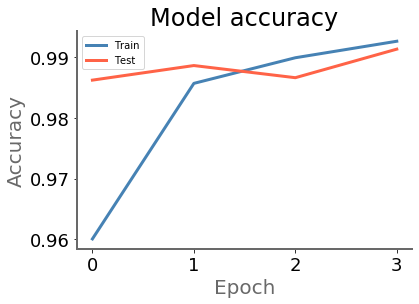

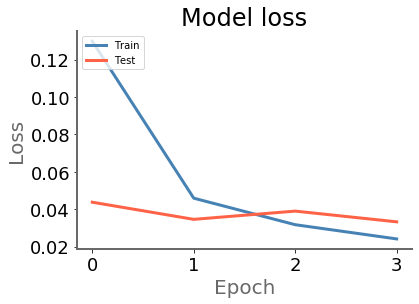

In [8]:
ooo.plot_history(history, figsize=(6,4), save_as="history")

## Confusion matrix

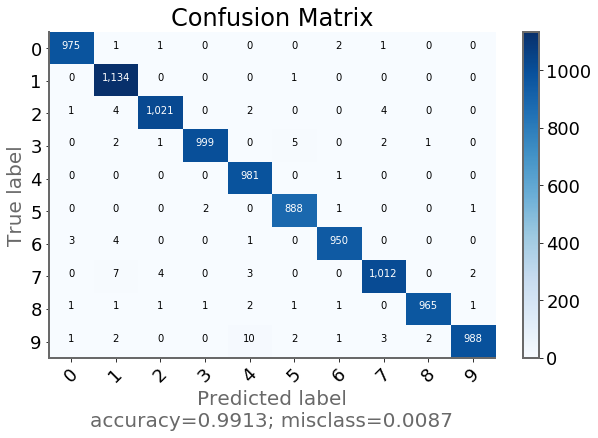

In [9]:
y_pred   = model.predict_classes(x_test)
conf_mat_op = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)

with tf.Session():
    conf_mat = tf.Tensor.eval(conf_mat_op,feed_dict=None, session=None)

ooo.plot_confusion_matrix(cm       = conf_mat, 
                  normalize    = False,
                  target_names = range(10),
                  title        = "Confusion Matrix",
                  figsize      = (10,6) ,
                  save_as      = "Confusion-matrix")

## Errors

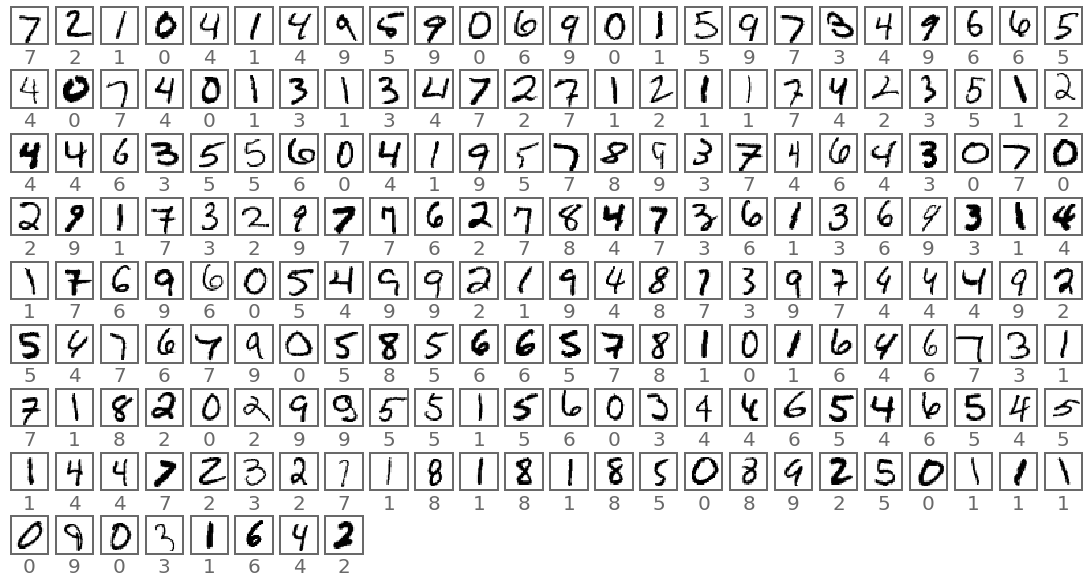

In [10]:
ooo.plot_images(x_test.reshape(-1,28,28), y_test, range(0,200), columns=24, x_size=0.8, y_size=0.8, y_pred=y_pred)

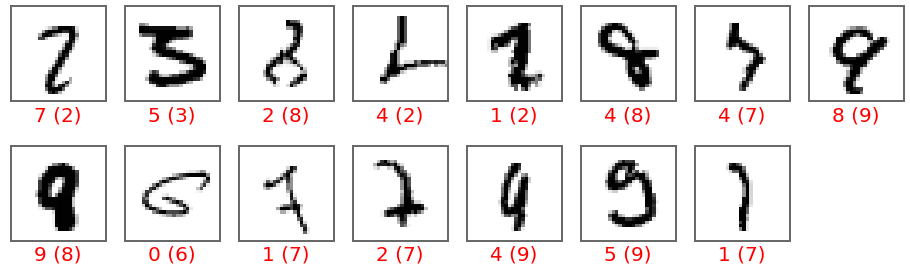

In [11]:
errors=[ i for i in range(len(x_test)) if y_pred[i]!=y_test[i] ]
ooo.plot_images(x_test.reshape(-1,28,28), y_test, errors[:15], columns=8, x_size=2, y_size=2, y_pred=y_pred)